# Prueba Técnica - Modelo Supervistado - Classificación

## 1. Importación de Librerias

In [1]:
# Loading some basic libraries to work
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from ydata_profiling import ProfileReport


## 1.1 Carga de datos

In [2]:
# Loading dataset using the ISO 8859-1 for the Latin Alphabet

tigo_df_v1 = pd.read_csv("prueba_2.csv", sep=';', delimiter=None,encoding='ISO-8859-1')

tigo_df_v1


,id,voice_min_used,voice_num_calls,sms_used,data_mb_used,data_active,revenue,network_active,antigüedad_cliente,digital_user,clase
0,463,2.567,2,0,84.417,1,0.00,1,4490,SI,0
1,465,0.000,0,0,0.000,0,0.00,0,4486,SI,0
2,495,0.000,0,0,17.654,1,0.35,1,4427,SI,0
3,466,13.483,5,0,275.018,1,0.00,1,4483,SI,0
4,467,0.000,0,0,173.531,1,0.00,1,4482,SI,0
...,...,...,...,...,...,...,...,...,...,...,...
26963,15255274,0.000,0,0,0.000,0,0.00,1,90,SI,2
26964,15522415,0.000,0,0,0.001,1,0.00,1,66,SI,2
26965,8698502,0.000,0,0,18.914,1,0.00,1,1602,SI,2
26966,10052528,4.350,2,0,0.000,0,0.00,1,1317,SI,2


## 2. Analisis exploratorio de datos (EDA)


In [9]:
#We have to analyze why "data_mb_used" its a categorical column.
'''
profile = ProfileReport(tigo_df_v1, title="Profiling Report")
profile.to_widgets()
'''

'\nprofile = ProfileReport(tigo_df_v1, title="Profiling Report")\nprofile.to_widgets()\n'

# 3. Procesamiento de Datos

## 3.1 Limpieza de datos

## 3.1.1 Eliminación de los nulos

In [3]:
# No Null values in the data
tigo_df_v1.isnull().sum()

id                    0
voice_min_used        0
voice_num_calls       0
sms_used              0
data_mb_used          0
data_active           0
revenue               0
network_active        0
antigüedad_cliente    0
digital_user          0
clase                 0
dtype: int64

#### Transformando la columna de datos usados a numerico ya que se uso puntuación para miles y para los milesimos.

In [4]:
#Removing the "." dots and transforming into a numerical value
tigo_df_v1['data_mb_used'] = tigo_df_v1['data_mb_used'].str.replace('.', '')
tigo_df_v1['data_mb_used'] = pd.to_numeric(tigo_df_v1['data_mb_used'])
tigo_df_v1

C:\Users\JoseLuis\AppData\Local\Temp\ipykernel_8376\3570491035.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tigo_df_v1['data_mb_used'] = tigo_df_v1['data_mb_used'].str.replace('.', '')


,id,voice_min_used,voice_num_calls,sms_used,data_mb_used,data_active,revenue,network_active,antigüedad_cliente,digital_user,clase
0,463,2.567,2,0,84417,1,0.00,1,4490,SI,0
1,465,0.000,0,0,0,0,0.00,0,4486,SI,0
2,495,0.000,0,0,17654,1,0.35,1,4427,SI,0
3,466,13.483,5,0,275018,1,0.00,1,4483,SI,0
4,467,0.000,0,0,173531,1,0.00,1,4482,SI,0
...,...,...,...,...,...,...,...,...,...,...,...
26963,15255274,0.000,0,0,0,0,0.00,1,90,SI,2
26964,15522415,0.000,0,0,1,1,0.00,1,66,SI,2
26965,8698502,0.000,0,0,18914,1,0.00,1,1602,SI,2
26966,10052528,4.350,2,0,0,0,0.00,1,1317,SI,2


In [5]:
#Fixing the numbers to have the milsims back.
tigo_df_v1['data_mb_used'] = tigo_df_v1['data_mb_used']/1000
tigo_df_v1

,id,voice_min_used,voice_num_calls,sms_used,data_mb_used,data_active,revenue,network_active,antigüedad_cliente,digital_user,clase
0,463,2.567,2,0,84.417,1,0.00,1,4490,SI,0
1,465,0.000,0,0,0.000,0,0.00,0,4486,SI,0
2,495,0.000,0,0,17.654,1,0.35,1,4427,SI,0
3,466,13.483,5,0,275.018,1,0.00,1,4483,SI,0
4,467,0.000,0,0,173.531,1,0.00,1,4482,SI,0
...,...,...,...,...,...,...,...,...,...,...,...
26963,15255274,0.000,0,0,0.000,0,0.00,1,90,SI,2
26964,15522415,0.000,0,0,0.001,1,0.00,1,66,SI,2
26965,8698502,0.000,0,0,18.914,1,0.00,1,1602,SI,2
26966,10052528,4.350,2,0,0.000,0,0.00,1,1317,SI,2


In [6]:
#Cientific notation remover
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)


## 4. Analisis estadístico de clases

In [7]:
#exporting to csv
#Analisis_por_Clase.to_csv("Clases.csv")

In [7]:
tigo_df_aux = tigo_df_v1.copy()
tigo_df_aux = pd.get_dummies(tigo_df_aux,columns=["digital_user"])
tigo_df_aux = tigo_df_aux.drop("id",axis=1)
Analisis_por_Clase = tigo_df_aux.groupby("clase").agg([np.mean, np.median, min, max])
Analisis_por_Clase

voice_min_used                    voice_num_calls                 \
                mean median  min    max            mean median min max   
clase                                                                    
0               3.50   0.45 0.00 228.35            2.08   1.00   0  53   
1               2.85   0.15 0.00  35.55            1.53   1.00   0  12   
2               0.05   0.00 0.00  38.78            0.02   0.00   0   7   

      sms_used                data_mb_used                      data_active  \
          mean median min max         mean median  min      max        mean   
clase                                                                         
0         0.06   0.00   0  43       515.73 175.80 0.00 27833.33        0.87   
1         0.01   0.00   0   1       435.84 103.46 0.00  6897.70        0.78   
2         0.00   0.00   0   0         4.52   0.00 0.00  1772.61        0.27   

                     revenue                   network_active                 \
      median min max    mean median  min   max           mean median min max   
clase                                                                          
0       1.00   0   1    0.62   0.00 0.00 61.16           0.89   1.00   0   1   
1       1.00   0   1    0.96   0.00 0.00 14.00           0.86   1.00   0   1   
2       0.00   0   1    0.01   0.00 0.00 41.00           0.75   1.00   0   1   

      antigüedad_cliente                   digital_user_NO                 \
                    mean  median min   max            mean median min max   
clase                                                                       
0                1818.90 1372.50   0  9180            0.07   0.00   0   1   
1                 606.82  256.50   1  4710            0.21   0.00   0   1   
2                 971.42  411.50  50  8228            0.08   0.00   0   1   

      digital_user_SI                 
                 mean median min max  
clase                                 
0                0.93   1.00   0   1  
1                0.79   1.00   0   1  
2                0.92   1.00   0   1

## Analisis descriptivo de clases

#### Clase 0 (20262 usuarios): La clase mas proliferada, consumen muchos más que las demas clases y tienen la mayor taza de consumo de megas y conectividad en la red, son clientes antiguos que al igual consumen las aplicaciones de la compañia. Los gastos adicionales son variados pero su media sigue siendo inferior a la clase 1.
#### Clase 1 (98 usuarios): Usuario de bajo consumo de recursos, pero consumo de megas medio, son estan activos en la red y tienden a generar un gasto extra aunque no parece ser significante (Se desconoce la escala del revenue), tienen antiguedades variadas y al menos el 21% no ocupa aplicaciones digitales de la compañia.
#### Clase 2 (6608 usuarios): Usuarios de bajo consumo en los ultimos 30 dias, aun asi existe un pequeño uso de megas. No producen gastos extras aunque si estuvieron conectados a una red en los ultimos 30 dias. Cuentan con antiguedad y ocupan aplicaciones digitales de la compañia.

In [8]:
tigo_df_v1[tigo_df_v1["clase"] == 1]

,id,voice_min_used,voice_num_calls,sms_used,data_mb_used,data_active,revenue,network_active,antigüedad_cliente,digital_user,clase
20262,6913249,0.00,0,0,809.58,1,0.00,1,1850,SI,1
20263,15467787,0.00,0,0,18.73,1,0.00,1,70,NO,1
20264,11169071,0.00,0,0,823.58,1,0.00,1,724,SI,1
20265,15968549,0.00,0,0,0.00,0,0.00,1,22,NO,1
20266,9285135,11.17,5,0,141.31,1,1.69,1,1513,SI,1
...,...,...,...,...,...,...,...,...,...,...,...
20355,16067217,0.00,0,0,0.00,0,0.00,0,13,SI,1
20356,15589267,3.07,5,0,456.75,1,0.48,1,59,SI,1
20357,10600963,4.85,2,0,15.55,1,0.00,1,522,SI,1
20358,11990537,0.00,0,0,0.00,0,0.00,1,493,SI,1


In [9]:
#Ugly but works
tigo_df_v1.groupby(["clase"]).count()

,id,voice_min_used,voice_num_calls,sms_used,data_mb_used,data_active,revenue,network_active,antigüedad_cliente,digital_user
clase,,,,,,,,,,
0,20262,20262,20262,20262,20262,20262,20262,20262,20262,20262
1,98,98,98,98,98,98,98,98,98,98
2,6608,6608,6608,6608,6608,6608,6608,6608,6608,6608


## 4.1 Diagramas

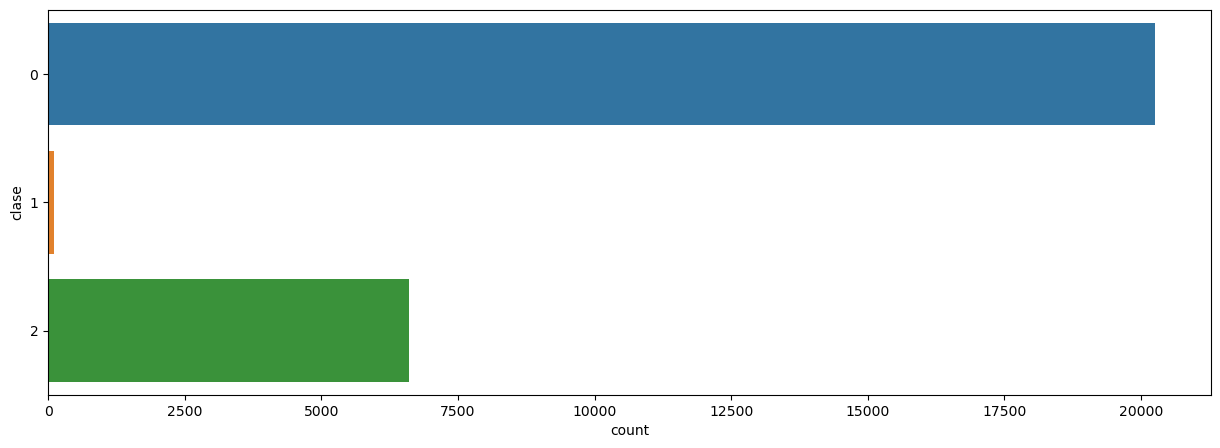

In [10]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'clase' , data = tigo_df_v1)
plt.show()

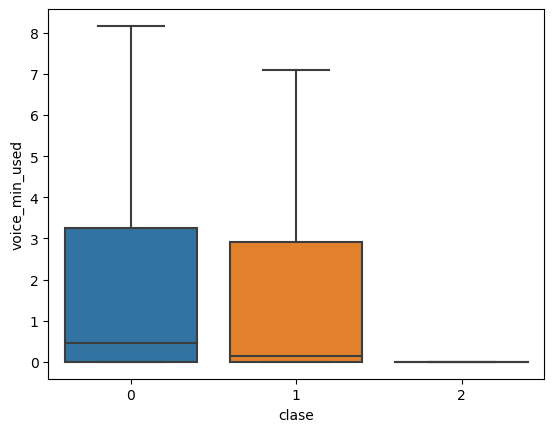

In [19]:
sns.boxplot( x=tigo_df_v1["clase"], y=tigo_df_v1["voice_min_used"], showfliers=False);
plt.ticklabel_format(style='plain', axis='y')
plt.show()

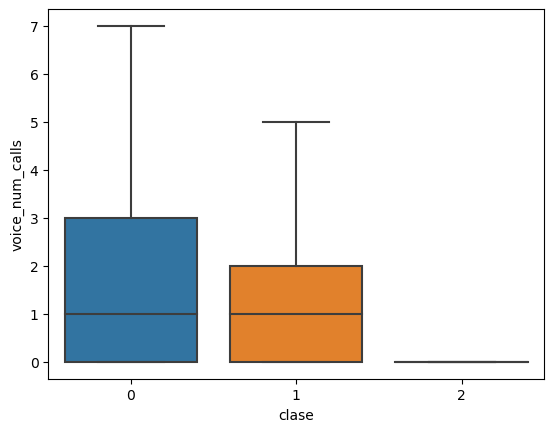

In [20]:
sns.boxplot( x=tigo_df_v1["clase"], y=tigo_df_v1["voice_num_calls"], showfliers=False);
plt.ticklabel_format(style='plain', axis='y')
plt.show()

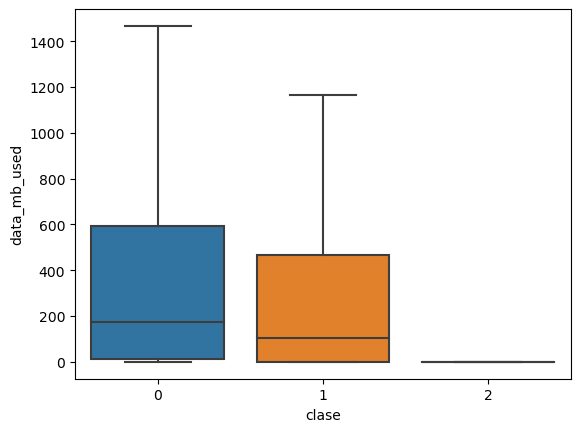

In [21]:
sns.boxplot( x=tigo_df_v1["clase"], y=tigo_df_v1["data_mb_used"], showfliers=False);
plt.ticklabel_format(style='plain', axis='y')
plt.show()

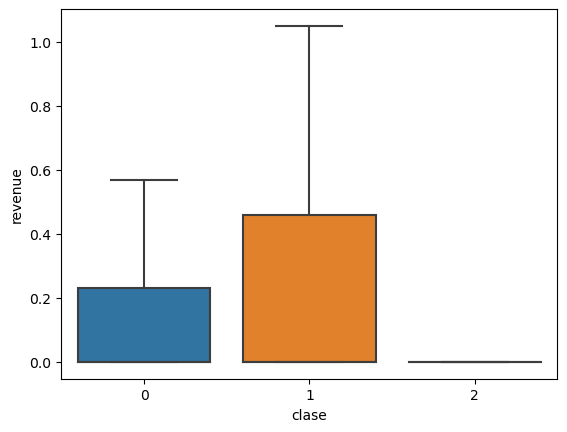

In [22]:
sns.boxplot( x=tigo_df_v1["clase"], y=tigo_df_v1["revenue"], showfliers=False);
plt.ticklabel_format(style='plain', axis='y')
plt.show()

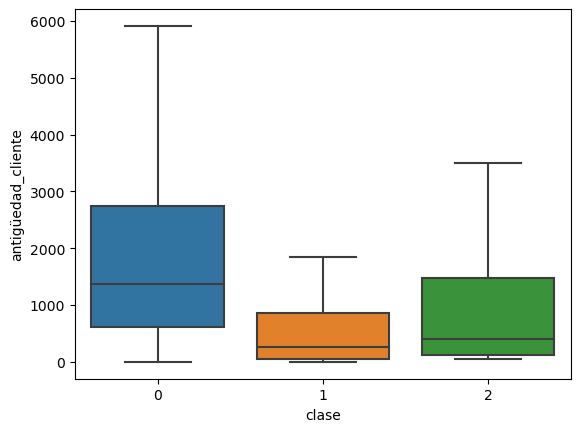

In [23]:
sns.boxplot( x=tigo_df_v1["clase"], y=tigo_df_v1["antigüedad_cliente"], showfliers=False);
plt.ticklabel_format(style='plain', axis='y')
plt.show()

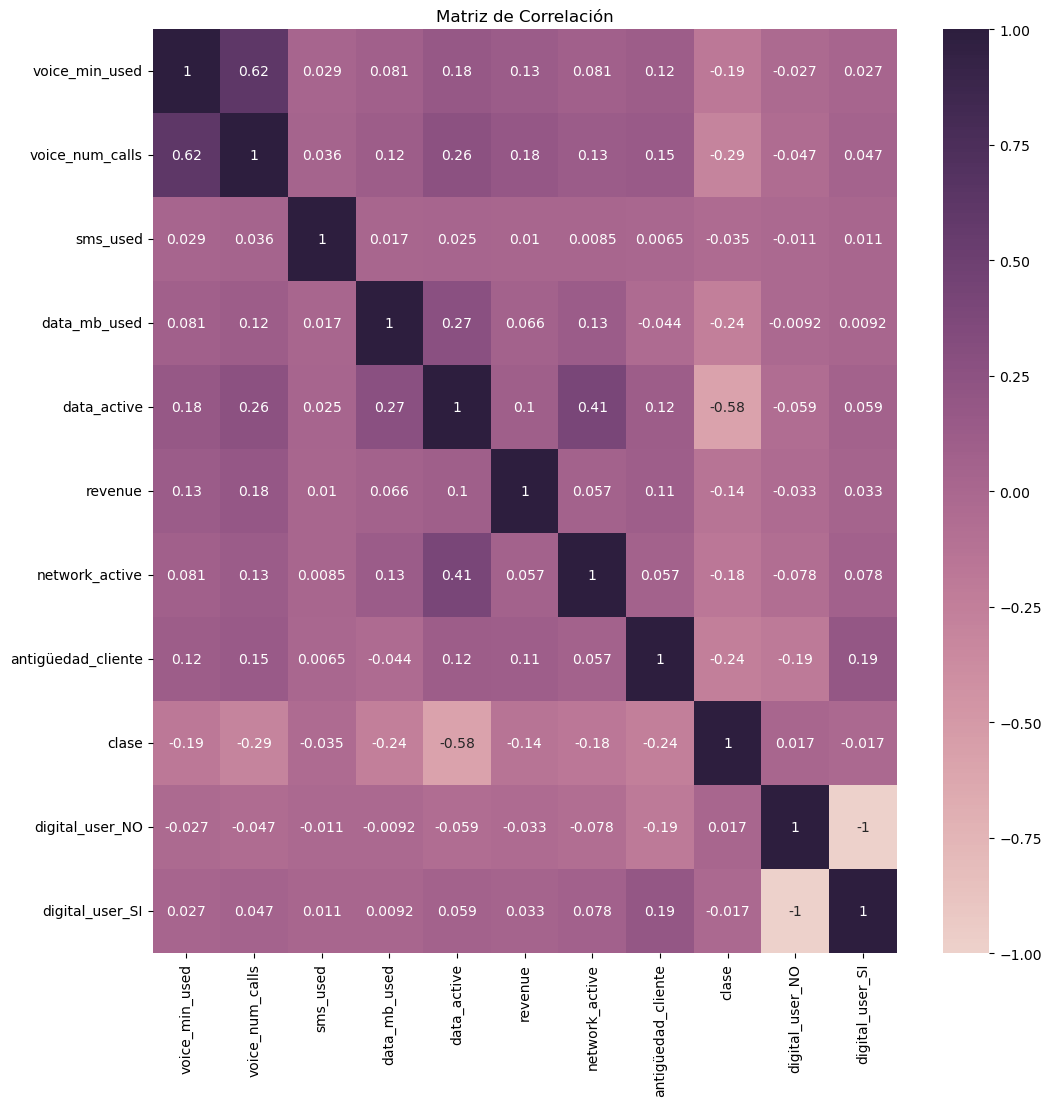

In [24]:
# Correlation matrix
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(tigo_df_aux.corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True)).set(title='Matriz de Correlación')
plt.show()

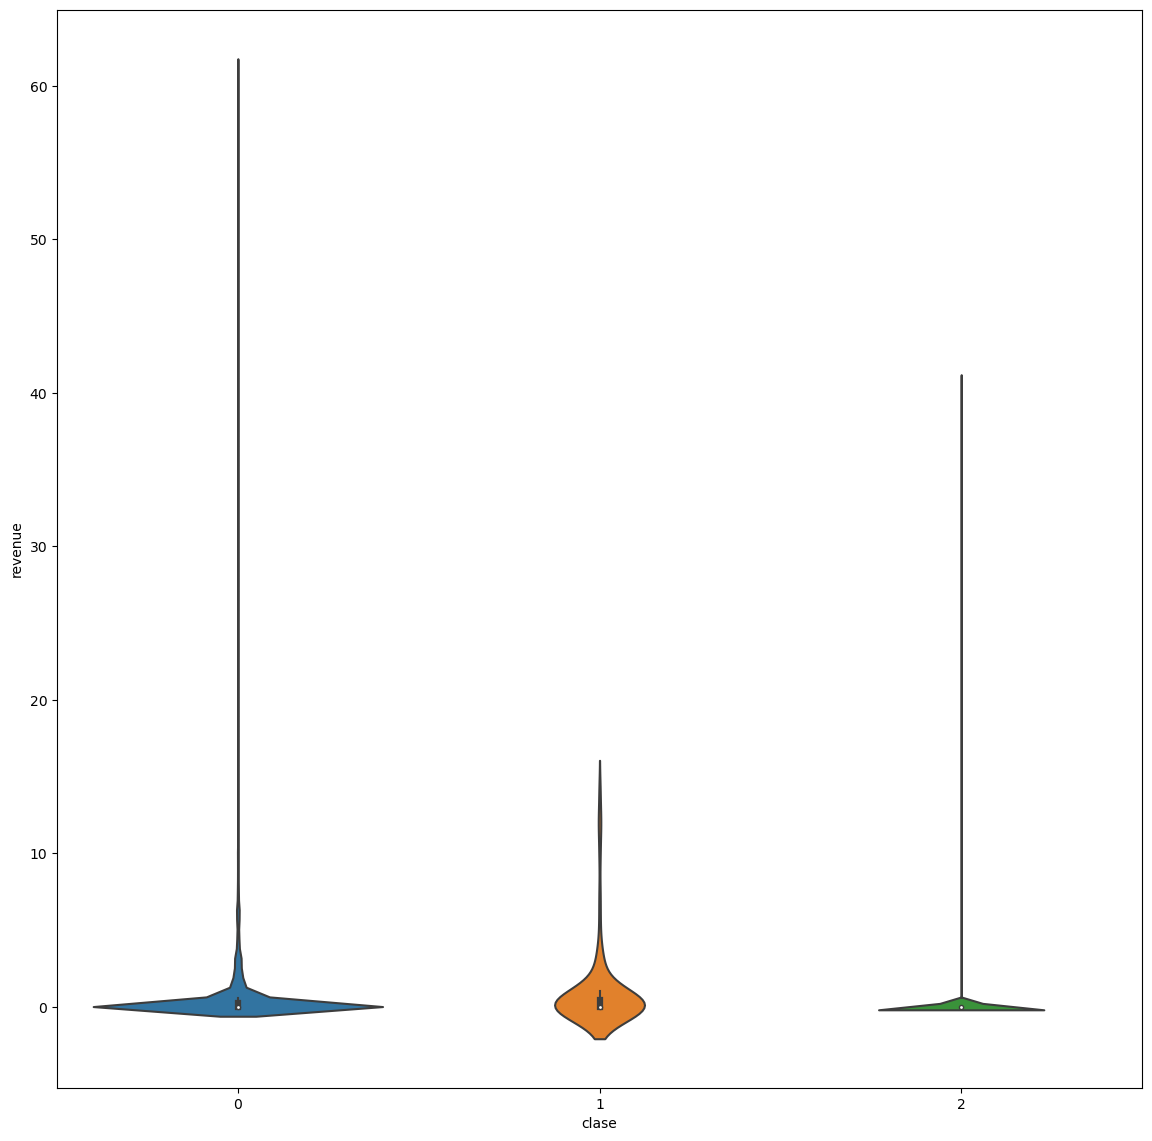

In [25]:
#Revenue analysis
plt.figure(figsize=(14, 14))
sns.violinplot(data=tigo_df_v1, x="clase", y="revenue")
# Display the plot
plt.show()

# 5. Desarrollo de Modelo Predictivo 


## 5.4.1 Cargado de librerias

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [12]:
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

NVIDIA GeForce RTX 3070 Ti
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


### 5.4.2 Definiendo nuestra clase de Dataset

#### Preparando mis datos para procesarlos

In [61]:
tigo_df_nn = tigo_df_v1.copy()
tigo_df_nn = pd.get_dummies(tigo_df_nn, columns=["digital_user"])
tigo_df_nn = pd.get_dummies(tigo_df_nn, columns=["data_active"])
tigo_df_nn = pd.get_dummies(tigo_df_nn, columns=["network_active"])
tigo_df_nn = tigo_df_nn.drop("id",axis=1)
tigo_df_nn = tigo_df_nn.replace({True: 1, False: 0})
tigo_df_nn


,voice_min_used,voice_num_calls,sms_used,data_mb_used,revenue,antigüedad_cliente,clase,digital_user_NO,digital_user_SI,data_active_0,data_active_1,network_active_0,network_active_1
0,2.57,2,0,84.42,0.00,4490,0,0,1,0,1,0,1
1,0.00,0,0,0.00,0.00,4486,0,0,1,1,0,1,0
2,0.00,0,0,17.65,0.35,4427,0,0,1,0,1,0,1
3,13.48,5,0,275.02,0.00,4483,0,0,1,0,1,0,1
4,0.00,0,0,173.53,0.00,4482,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26963,0.00,0,0,0.00,0.00,90,2,0,1,1,0,0,1
26964,0.00,0,0,0.00,0.00,66,2,0,1,0,1,0,1
26965,0.00,0,0,18.91,0.00,1602,2,0,1,0,1,0,1
26966,4.35,2,0,0.00,0.00,1317,2,0,1,1,0,0,1


In [62]:
Y = tigo_df_nn["clase"]
Y= Y.to_numpy()
X = tigo_df_nn.copy()
X = X.drop("clase",axis=1)

In [155]:
X

,voice_min_used,voice_num_calls,sms_used,data_mb_used,revenue,antigüedad_cliente,digital_user_NO,digital_user_SI,data_active_0,data_active_1,network_active_0,network_active_1
0,2.57,2,0,84.42,0.00,4490,0,1,0,1,0,1
1,0.00,0,0,0.00,0.00,4486,0,1,1,0,1,0
2,0.00,0,0,17.65,0.35,4427,0,1,0,1,0,1
3,13.48,5,0,275.02,0.00,4483,0,1,0,1,0,1
4,0.00,0,0,173.53,0.00,4482,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
26963,0.00,0,0,0.00,0.00,90,0,1,1,0,0,1
26964,0.00,0,0,0.00,0.00,66,0,1,0,1,0,1
26965,0.00,0,0,18.91,0.00,1602,0,1,0,1,0,1
26966,4.35,2,0,0.00,0.00,1317,0,1,1,0,0,1


In [63]:
import scipy.stats as stats
X["voice_min_used"] = stats.zscore(X["voice_min_used"])
X["voice_num_calls"] = stats.zscore(X["voice_num_calls"])
X["sms_used"] = stats.zscore(X["sms_used"])
X["data_mb_used"] = stats.zscore(X["data_mb_used"])
X["revenue"] = stats.zscore(X["revenue"])
X["antigüedad_cliente"] = stats.zscore(X["antigüedad_cliente"])
X

,voice_min_used,voice_num_calls,sms_used,data_mb_used,revenue,antigüedad_cliente,digital_user_NO,digital_user_SI,data_active_0,data_active_1,network_active_0,network_active_1
0,-0.01,0.14,-0.06,-0.34,-0.25,1.92,0,1,0,1,0,1
1,-0.33,-0.52,-0.06,-0.44,-0.25,1.92,0,1,1,0,1,0
2,-0.33,-0.52,-0.06,-0.42,-0.06,1.88,0,1,0,1,0,1
3,1.36,1.13,-0.06,-0.13,-0.25,1.92,0,1,0,1,0,1
4,-0.33,-0.52,-0.06,-0.24,-0.25,1.92,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
26963,-0.33,-0.52,-0.06,-0.44,-0.25,-1.01,0,1,1,0,0,1
26964,-0.33,-0.52,-0.06,-0.44,-0.25,-1.03,0,1,0,1,0,1
26965,-0.33,-0.52,-0.06,-0.41,-0.25,-0.00,0,1,0,1,0,1
26966,0.21,0.14,-0.06,-0.44,-0.25,-0.19,0,1,1,0,0,1


In [64]:
Y.astype('float32')

array([0., 0., 0., ..., 2., 2., 2.], dtype=float32)

In [65]:
# Y is already given as vector.
X = X.to_numpy()
X.astype('float32')


array([[-0.01114796,  0.14068674, -0.0606021 , ...,  1.        ,
         0.        ,  1.        ],
       [-0.33417684, -0.51794356, -0.0606021 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.33417684, -0.51794356, -0.0606021 , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.33417684, -0.51794356, -0.0606021 , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.2132231 ,  0.14068674, -0.0606021 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.33417684, -0.51794356, -0.0606021 , ...,  0.        ,
         1.        ,  0.        ]], dtype=float32)

In [66]:
Y

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [19]:
import torch
import torch.nn as nn
import torch.utils.data as data
from torch.utils.data import TensorDataset, DataLoader
import torchvision as tv
import torch.nn.functional as F
import lightning as L
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [68]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((21574, 12), (21574,), (5394, 12), (5394,))

In [47]:
'''X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))'''

AttributeError: 'Tensor' object has no attribute 'astype'

In [23]:
'''X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)'''

In [24]:
'''y_train = y_train.view(y_train.shape[0],1)
print(y_train)
y_test = y_test.view(y_test.shape[0],1)
print(y_test)'''

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [2.]], device='cuda:0')
tensor([[0.],
        [2.],
        [2.],
        ...,
        [0.],
        [0.],
        [2.]], device='cuda:0')


In [202]:
class Model(nn.Module):
    def __init__(self,D_in,H1,H2,H3,D_out,p=0):
        super(Model,self).__init__()
        self.drop=nn.Dropout(p=p)
        self.linear1=nn.Linear(D_in,H1)
        nn.init.kaiming_uniform_(self.linear1.weight,nonlinearity='relu')
        self.linear2=nn.Linear(H1,H2)
        nn.init.kaiming_uniform_(self.linear2.weight,nonlinearity='relu')
        self.linear3=nn.Linear(H2,H3)
        nn.init.kaiming_uniform_(self.linear2.weight,nonlinearity='relu')
        self.linear_out=nn.Linear(H3,D_out)

        #self.batchnorm1 = nn.BatchNorm1d(512)
        #self.batchnorm2 = nn.BatchNorm1d(128)
        #self.batchnorm3 = nn.BatchNorm1d(64)
        
    def forward(self,x):
        x=F.relu(self.linear1(x))
        #x = self.batchnorm1(x)
        x=self.drop(x)
        x=F.relu(self.linear2(x))
        #x = self.batchnorm2(x)
        x=self.drop(x)
        x=F.relu(self.linear3(x))
        #x = self.batchnorm3(x)
        x=self.drop(x)
        x=self.linear_out(x)
        return x

In [189]:
n_samples, n_features = X.shape
print(n_samples , n_features)

6 12


In [203]:
input_dim  = 12     # how many Variables are in the dataset
hidden_dim1 = 512   # hidden layers
hidden_dim2 = 128   # hidden layers
hidden_dim3 = 64    # hidden layers
output_dim = 3      # number of classes
input_dim

12

In [204]:
# Instantiate model
model = Model(input_dim,hidden_dim1,hidden_dim2,hidden_dim3,output_dim, p = 0)
model_drop = Model(input_dim,hidden_dim1,hidden_dim2,hidden_dim3,output_dim, p=0.2)
model.to(device)
model_drop.to(device)

Model(
  (drop): Dropout(p=0.2, inplace=False)
  (linear1): Linear(in_features=12, out_features=512, bias=True)
  (linear2): Linear(in_features=512, out_features=128, bias=True)
  (linear3): Linear(in_features=128, out_features=64, bias=True)
  (linear_out): Linear(in_features=64, out_features=3, bias=True)
)

In [215]:
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#optimizer =torch.optim.Adam(model.parameters(), lr=learning_rate)

In [216]:
from torch.utils.data import Dataset, DataLoader
class Dataset(Dataset):
    def __init__(self, X, y):
    # convert into PyTorch tensors and remember them
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        # this should return the size of the dataset
        return len(self.X)

    def __getitem__(self, idx):
        # this should return one sample from the dataset
        features = self.X[idx]
        target = self.y[idx]
        return features, target


In [217]:
dataset = Dataset(X_train,y_train)
dataloader = DataLoader(dataset=dataset, batch_size=32, shuffle=True)

epoch: 1, loss = 0.3448, 11.032269477844238
epoch: 1, loss = 0.2954, 20.48420238494873
epoch: 1, loss = 0.1879, 26.496188163757324
epoch: 1, loss = 0.2410, 34.208794593811035
epoch: 1, loss = 0.1553, 39.1793532371521
epoch: 1, loss = 0.4003, 51.98922109603882
epoch: 1, loss = 0.1389, 56.4335241317749
epoch: 1, loss = 0.2217, 63.527019023895264
epoch: 1, loss = 0.1555, 68.50276327133179
epoch: 1, loss = 0.3863, 80.86333131790161
epoch: 1, loss = 0.2386, 88.49893379211426
epoch: 1, loss = 0.3012, 98.13835144042969
epoch: 1, loss = 0.2592, 106.43258380889893
epoch: 1, loss = 0.2097, 113.1427001953125
epoch: 1, loss = 0.1245, 117.12518572807312
epoch: 1, loss = 0.1267, 121.18001866340637
epoch: 1, loss = 0.3146, 131.24682354927063
epoch: 1, loss = 0.1818, 137.06422448158264
epoch: 1, loss = 0.2131, 143.8834249973297
epoch: 1, loss = 0.3076, 153.72654843330383
epoch: 1, loss = 0.2627, 162.13290524482727
epoch: 1, loss = 0.0941, 165.1452441215515
epoch: 1, loss = 0.2223, 172.2583122253418
ep

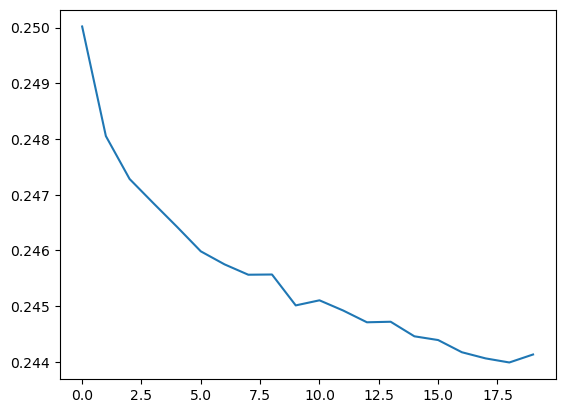

In [218]:
num_epochs = 20
losses = []
for epoch in range(num_epochs):
    running_loss = 0.0
    for X, Y in dataloader:
        X = X.to(device)
        Y = Y.type(torch.LongTensor) # casting to long
        Y = Y.to(device)
        # Forward pass and loss
        model=model.to(device)
        y_pred = model(X)
        loss = criterion(y_pred, Y)

        # Backward pass and update
        loss.backward()
        optimizer.step()

        # zero grad before new step
        optimizer.zero_grad()
        
        running_loss += loss.item() * Y.size(0)
        
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}, {running_loss}')
    epoch_loss = running_loss / 21574 #21574 its he size of input from each epoch 
    losses.append(epoch_loss)


plt.plot(losses)


In [80]:
def accuracy(model, ds):
  # assumes model.eval()
  # item-by-item version
  n_correct = 0; n_wrong = 0
  for i in range(len(ds)):
    X = ds[i][0].reshape(1,-1)  # make it a batch
    Y = ds[i][1].reshape(1)  # 0 1 or 2, 1D
    with torch.no_grad():
      X = X.to("cpu")
      Y = Y.type(torch.LongTensor)
      Y = Y.to("cpu")
      model = model.to("cpu")
      oupt = model(X)  # logits form

    big_idx = torch.argmax(oupt)  # 0 or 1 or 2
    if big_idx == Y:
      n_correct += 1
    else:
      n_wrong += 1

  acc = (n_correct * 1.0) / (n_correct + n_wrong)
  return acc


In [81]:
def do_acc(model, dataset, n_classes):
  X = dataset[0:len(dataset)][0]  # all X values
  Y = dataset[0:len(dataset)][1]  # all Y values
  with torch.no_grad():
    X = X.to("cpu")
    Y = Y.type(torch.LongTensor)
    Y = Y.to("cpu")
    model = model.to("cpu")
    oupt = model(X)  #  [40,3]  all logits

  for c in range(n_classes):
    idxs = np.where(Y==c)  # indices where Y is c
    logits_c = oupt[idxs]  # logits corresponding to Y == c
    arg_maxs_c = torch.argmax(logits_c, dim=1)  # predicted class
    num_correct = torch.sum(arg_maxs_c == c)
    acc_c = num_correct.item() / len(arg_maxs_c)
    acc_c = acc_c
    print("%0.4f " % acc_c)

In [136]:
data_test = Dataset(X_test,y_test)

In [209]:
do_acc(model,data_test, 3)

0.9402 
0.0000 
0.7144 


0.8836 
0.0000 
0.9220  

0.9090 
0.0000 
0.8366 

In [214]:
accuracy(model,data_test)

0.8817204301075269

0.8906192065257694

0.8885799035965888


In [ ]:
'''model = LitModel()
trainer =L.Trainer(max_epochs=100, accelerator="auto", devices= "auto")'''

In [ ]:
'''lr_find_results = trainer.tuner.lr_find(model,
                                        train_dataloader=dataloader,
                                        min_lr=0.001,
                                        max_lr=1.0,
                                        early_stop_treshold=None)'''

In [ ]:
'''new_lr = lr_find_results.suggestion()
print(f"Suggested LR is {new_lr:.5f}.")
model.learning_rate = new_lr'''

In [ ]:
'''trainer.fit(model, train_dataloaders=dataloader )'''

In [97]:
'''from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self):
        self.x=torch.from_numpy(x_train)
        self.y=torch.from_numpy(y_train)
        self.len=self.x.shape[0]
    def __getitem__(self,index):      
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len'''

In [ ]:
'''class LitModel(L.LightningModule):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(nn.Linear(28 * 28, 128), nn.ReLU(), nn.Linear(128, 3))
        self.decoder = nn.Sequential(nn.Linear(3, 128), nn.ReLU(), nn.Linear(128, 28 * 28))

    def forward(self, x):
        # in lightning, forward defines the prediction/inference actions
        embedding = self.encoder(x)
        return embedding

    def training_step(self, batch, batch_idx):
        # training_step defines the train loop. It is independent of forward
        x, y = batch
        x = x.view(x.size(0), -1)
        z = self.encoder(x)
        x_hat = self.decoder(z)
        loss = F.mse_loss(x_hat, x)
        self.log("train_loss", loss)
        return loss

    def configure_optimizers(self):

        return SGD(self.parameters(), lr=self.learning_rate)
        #optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)

    def training_step(self, batch, batch_idx):
        
        input_i, label_i = batch
        output_i = self.forward(input_i)
        loss = (output_i-label_i)**2

        return loss'''
    

In [380]:
'''predicted_labels = []
true_labels = []
with torch.no_grad():
    for inputs, labels in data_test:
        # Move inputs and labels to the device
        inputs = X.to("cpu")
        labels = Y.to("cpu")

        # Forward pass through the model
        model = model.to("cpu")
        outputs = model(inputs)

        # Get the predicted labels by taking the maximum value along the class dimension
        _, predicted = torch.max(outputs, dim=1)

        # Convert the predicted labels and true labels to CPU tensors
        predicted = predicted.cpu().numpy()
        labels = labels.cpu().numpy()

        # Append the predicted and true labels to the respective lists
        predicted_labels.extend(predicted.tolist())
        true_labels.extend(labels.tolist())
'''

In [ ]:
#len(true_labels)

In [383]:
#len(predicted_labels)

32364

In [91]:
len(data_test)

5394

In [211]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X, Y in data_test:
        Y = Y.to(device)
        model = model.to(device)
        X = X.to(device)
        y_test_pred = model(X)
        Y, y_pred_tags = torch.max(y_test_pred, dim = 0)
        y_pred_list.append(y_pred_tags.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [212]:
len(y_pred_list)

5394

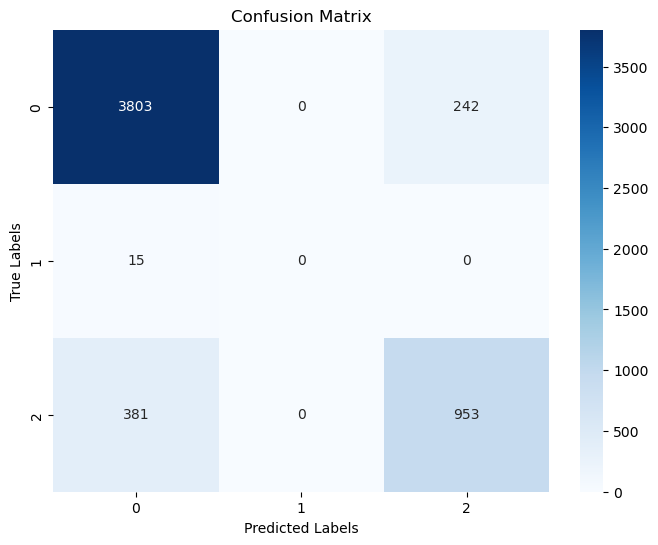

In [213]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_list)
labels = list(range(3))  # Assuming your class labels are integers
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()